**Cao Ngọc Bảo Long // ITDSIU18031**

# Defined Function

In [1]:
# Split Train and Test and check shape 
def SplitDataFrameToTrainAndTest(DataFrame, TrainDataRate, TargetAtt):
    # gets a random TrainDataRate % of the entire set
    training = DataFrame.sample(frac=TrainDataRate, random_state=1)
    # gets the left out portion of the dataset
    testing = DataFrame.loc[~DataFrame.index.isin(training.index)]

    X_train = training.drop(TargetAtt, 1)
    y_train = training[[TargetAtt]]
    X_test = testing.drop(TargetAtt, 1)
    y_test = testing[[TargetAtt]]

    return X_train, y_train, X_test, y_test
    
def PrintTrainTestInformation(X_train, y_train, X_test, y_test):
  print("Train rows and columns : ", X_train.shape)
  print("Test rows and columns : ", X_test.shape)

In [ ]:
def NaiveBayesLearning(DataTrain, TargetTrain):
    from sklearn.naive_bayes import GaussianNB
    NBModel = GaussianNB()
    NBModel.fit(DataTrain, TargetTrain.values.ravel())

    return NBModel

def NaiveBayesTesting(NBModel,DataTest, TargetTest):
    from sklearn.metrics import accuracy_score
    PredictTest = NBModel.predict(DataTest)
    Accuracy = accuracy_score(TargetTest, PredictTest)

    return Accuracy, PredictTest

In [ ]:
def LogisticRegressionLearning(DataTrain, TargetTrain):
    # Apply the Logistic Regression
    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics
    logreg = LogisticRegression()
    # training by Logistic Regression
    logreg.fit(DataTrain, TargetTrain.values.ravel())

    return logreg

def LogisticRegressionTesting(LRModel,DataTest, TargetTest):
    # Testing and calculate the accuracy
    from sklearn.metrics import accuracy_score

    logreg = LRModel
    PredictTest = logreg.predict(DataTest)
    Accuracy = accuracy_score(TargetTest, PredictTest)
    # print('Logistic regression accuracy: {:.3f}'.format(Accuracy))

    return Accuracy, PredictTest

In [ ]:
def RandomForestLearning(DataTrain, TargetTrain):
    from sklearn.ensemble import RandomForestClassifier

    rf = RandomForestClassifier()
    rf.fit(DataTrain, TargetTrain.values.ravel())

    return rf

def RandomForestTesting(RFModel,DataTest, TargetTest):
    from sklearn.metrics import accuracy_score

    PredictTest = RFModel.predict(DataTest)
    Accuracy = accuracy_score(TargetTest, PredictTest)
    # print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(TargetTest, PredictTest)))

    return Accuracy, PredictTest

In [ ]:
def SVMLearning(DataTrain, TargetTrain, ClassifierType = " "):
    from sklearn.svm import SVC
    if(ClassifierType == 'Linear'):
        svc = SVC(kernel="linear", C=0.025)
#         print('SVM Linear processing')
    # Radial basis function kernel
    elif (ClassifierType == 'RBF'):
        svc = SVC(gamma=2, C=1)
#         print('SVM RBF processing')
    else:
        svc = SVC()
#         print('SVM Default processing')
    svc.fit(DataTrain, TargetTrain.values.ravel())
    return svc

def SVMTesting(SVMModel, DataTest, TargetTest):
    from sklearn.metrics import accuracy_score
    PredictTest = SVMModel.predict(DataTest)
    Accuracy = accuracy_score(TargetTest, PredictTest)
    # print('Support Vector Machine Accuracy: {:.3f}'.format(accuracy_score(TargetTest, PredictTest)))
    return Accuracy, PredictTest

In [ ]:
def KNNLearning(DataTrain, TargetTrain, K = 3):
    from sklearn.neighbors import KNeighborsClassifier
    neigh = KNeighborsClassifier(n_neighbors=K)
    neigh.fit(DataTrain, TargetTrain.values.ravel())

    return neigh

def KNNTesting(KNNModel,DataTest, TargetTest):
    from sklearn.metrics import accuracy_score

    PredictTest = KNNModel.predict(DataTest)
    Accuracy = accuracy_score(TargetTest, PredictTest)
    # print('KNN Accuracy: {:.3f}'.format(accuracy_score(TargetTest, PredictTest)))

    return Accuracy, PredictTest

# **Main Code**

In [ ]:
# import basic libraries 
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# import plot libraries 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
# import ml libraries 
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn import linear_model, datasets 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
from sklearn.metrics import accuracy_score 
from sklearn.svm import LinearSVC, SVC

In [ ]:
# Read data
data = pd.read_csv("CustomerChurn.csv")
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Split Train and Test and check shape 
data_train, target_train, data_test, target_test = SplitDataFrameToTrainAndTest(data, 0.6, 'Churn')
PrintTrainTestInformation(data_train, target_train, data_test, target_test)

Train rows and columns :  (2000, 19)
Test rows and columns :  (1333, 19)


In [ ]:
data_encoder = data.copy()
data_encoder['State'] = LabelEncoder().fit_transform(data_encoder['State'])
data_encoder['International plan'] = LabelEncoder().fit_transform(data_encoder['International plan'])
data_encoder['Voice mail plan'] = LabelEncoder().fit_transform(data_encoder['Voice mail plan'])
data_encoder = data_encoder.join(pd.get_dummies(data_encoder['Area code'], prefix='Area_code_'))
data_encoder = data_encoder.drop('Area code', axis=1)
data_encoder.head(10)

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Area_code__408,Area_code__415,Area_code__510
0,16,128,0,1,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,False,0,1,0
1,35,107,0,1,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,False,0,1,0
2,31,137,0,0,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,False,0,1,0
3,35,84,1,0,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,False,1,0,0
4,36,75,1,0,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,False,0,1,0
5,1,118,1,0,0,223.4,98,37.98,220.6,101,...,118,9.18,6.3,6,1.70,0,False,0,0,1
6,19,121,0,1,24,218.2,88,37.09,348.5,108,...,118,9.57,7.5,7,2.03,3,False,0,0,1
7,24,147,1,0,0,157.0,79,26.69,103.1,94,...,96,9.53,7.1,6,1.92,0,False,0,1,0
8,18,117,0,0,0,184.5,97,31.37,351.6,80,...,90,9.71,8.7,4,2.35,1,False,1,0,0
9,49,141,1,1,37,258.6,84,43.96,222.0,111,...,97,14.69,11.2,5,3.02,0,False,0,1,0


In [ ]:
# Split Train and Test and check shape 
data_train_encoder, target_train_encoder, data_test_encoder, target_test_encoder = SplitDataFrameToTrainAndTest(data_encoder, 0.6, 'Churn')
PrintTrainTestInformation(data_train_encoder, target_train_encoder, data_test_encoder, target_test_encoder)

Train rows and columns :  (2000, 21)
Test rows and columns :  (1333, 21)


In [ ]:
X_train = data_train_encoder
y_train = target_train_encoder
X_test = data_test_encoder
y_test = target_test_encoder

NBModel = NaiveBayesLearning(X_train, y_train)
NBAccuracy,NBPredictTest = NaiveBayesTesting(NBModel,X_test, y_test)
print('Naive Bayes accuracy: {:.3f}'.format(NBAccuracy))

LRModel = LogisticRegressionLearning(X_train, y_train)
LRAccuracy,LRPredictTest = LogisticRegressionTesting(LRModel,X_test, y_test)
print('Logistic Regression accuracy: {:.3f}'.format(LRAccuracy))

RFModel = RandomForestLearning(X_train, y_train)
RFAccuracy,RFPredictTest = RandomForestTesting(RFModel,X_test, y_test)
print('Random Forest accuracy: {:.6f}'.format(RFAccuracy))

LiSVMModel = SVMLearning(X_train, y_train)
LiSVMAccuracy,LiSVMPredictTest = SVMTesting(LiSVMModel, X_test, y_test)
print('Linear SVM accuracy: {:.6f}'.format(LiSVMAccuracy))

RBFSVMModel = SVMLearning(X_train, y_train, 'RBF')
RBFSVMAccuracy,RBFSVMPredictTest = SVMTesting(RBFSVMModel, X_test, y_test)
print('RBF SVM accuracy: {:.6f}'.format(RBFSVMAccuracy))

KNNModel = KNNLearning(X_train, y_train)
KNNAccuracy,KNNPredictTest = KNNTesting(KNNModel,X_test, y_test)
print('K Nearest Neighbor accuracy: {:.6f}'.format(KNNAccuracy))

Naive Bayes accuracy: 0.866
Logistic Regression accuracy: 0.863
Random Forest accuracy: 0.933983
Linear SVM accuracy: 0.857464
RBF SVM accuracy: 0.857464
K Nearest Neighbor accuracy: 0.867217


D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


(2000, 21)


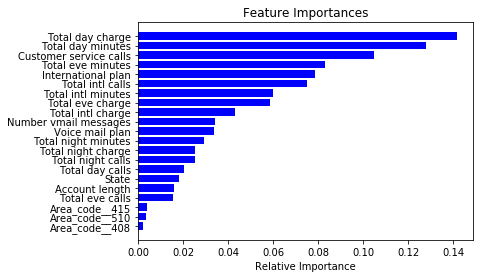

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(data_train_encoder,target_train_encoder)

print(data_train_encoder.shape)
features = data_train_encoder.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-len(features):]  # top features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Get numerical feature importances
feature_list = list(data_train_encoder.columns)
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Total day charge     Importance: 0.14
Variable: Total day minutes    Importance: 0.13
Variable: Customer service calls Importance: 0.1
Variable: International plan   Importance: 0.08
Variable: Total eve minutes    Importance: 0.08
Variable: Total intl calls     Importance: 0.08
Variable: Total eve charge     Importance: 0.06
Variable: Total intl minutes   Importance: 0.06
Variable: Total intl charge    Importance: 0.04
Variable: Voice mail plan      Importance: 0.03
Variable: Number vmail messages Importance: 0.03
Variable: Total night minutes  Importance: 0.03
Variable: Total night calls    Importance: 0.03
Variable: Total night charge   Importance: 0.03
Variable: State                Importance: 0.02
Variable: Account length       Importance: 0.02
Variable: Total day calls      Importance: 0.02
Variable: Total eve calls      Importance: 0.02
Variable: Area_code__408       Importance: 0.0
Variable: Area_code__415       Importance: 0.0
Variable: Area_code__510       Importanc

In [ ]:
# Split Train and Test and check shape 
AttSelection = ["Total day charge", "Total day minutes", "Customer service calls", "International plan", "Total eve minutes",
                "Total intl calls", "Total eve charge", "Total intl minutes", "Total intl charge", "Voice mail plan",
                "Number vmail messages", "Total night minutes", "Total night calls", "Total night charge",
               "Churn"]

data_train_encoder_feselection02, target_train_encoder_feselection02, data_test_encoder_feselection02, target_test_encoder_feselection02 = SplitDataFrameToTrainAndTest(data_encoder[AttSelection], 0.6, 'Churn')
PrintTrainTestInformation(data_train_encoder_feselection02, target_train_encoder_feselection02, data_test_encoder_feselection02, target_test_encoder_feselection02)

Train rows and columns :  (2000, 14)
Test rows and columns :  (1333, 14)


In [ ]:
# Retest all traditional classification approaches
X_train = data_train_encoder_feselection02
y_train = target_train_encoder_feselection02
X_test = data_test_encoder_feselection02
y_test = target_test_encoder_feselection02

NBModel = NaiveBayesLearning(X_train, y_train)
NBAccuracy,NBPredictTest = NaiveBayesTesting(NBModel,X_test, y_test)
print('Naive Bayes accuracy: {:.6f}'.format(NBAccuracy))

LRModel = LogisticRegressionLearning(X_train, y_train)
LRAccuracy,LRPredictTest = LogisticRegressionTesting(LRModel,X_test, y_test)
print('Logistic Regression accuracy: {:.6f}'.format(LRAccuracy))

RFModel = RandomForestLearning(X_train, y_train)
RFAccuracy,RFPredictTest = RandomForestTesting(RFModel,X_test, y_test)
print('Random Forest accuracy: {:.6f}'.format(RFAccuracy))

LiSVMModel = SVMLearning(X_train, y_train)
LiSVMAccuracy,LiSVMPredictTest = SVMTesting(LiSVMModel, X_test, y_test)
print('Linear SVM accuracy: {:.6f}'.format(LiSVMAccuracy))

RBFSVMModel = SVMLearning(X_train, y_train, 'RBF')
RBFSVMAccuracy,RBFSVMPredictTest = SVMTesting(RBFSVMModel, X_test, y_test)
print('RBF SVM accuracy: {:.6f}'.format(RBFSVMAccuracy))

KNNModel = KNNLearning(X_train, y_train)
KNNAccuracy,KNNPredictTest = KNNTesting(KNNModel,X_test, y_test)
print('K Nearest Neighbor accuracy: {:.6f}'.format(KNNAccuracy))

Naive Bayes accuracy: 0.864966
Logistic Regression accuracy: 0.861965
Random Forest accuracy: 0.951238
Linear SVM accuracy: 0.857464
RBF SVM accuracy: 0.857464
K Nearest Neighbor accuracy: 0.885971


*Neural Network*

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

seed = 42
np.random.seed(seed)

## Create our model
model = Sequential()

# 1st layer: input_dim=21, 12 nodes, RELU
model.add(Dense(12, input_dim=21, init='uniform', activation='relu'))
# 2nd layer: 8 nodes, RELU
model.add(Dense(8, init='uniform', activation='relu'))
# output layer: dim=1, activation sigmoid
model.add(Dense(1, init='uniform', activation='sigmoid' ))

## Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

# Compile the model
model.compile(loss='binary_crossentropy',   # since we are predicting 0/1
             optimizer='adam',
             metrics=['accuracy'])

D:\anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=21, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
D:\anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  app.launch_new_instance()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 12)                264       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 377
Trainable params: 377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Retest all traditional classification approaches
X_train = data_train_encoder
y_train = target_train_encoder
X_testNN = data_test_encoder
y_testNN = target_test_encoder

NB_EPOCHS = 500  # num of epochs to test for
BATCH_SIZE = 15

# checkpoint: store the best model
ckpt_model = 'pima-weights.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

print('Starting training...')
# train the model, store the results for plotting
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_testNN, y_testNN),
                    nb_epoch=NB_EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=callbacks_list,
                    verbose=0)

Starting training...

Epoch 00001: val_acc improved from -inf to 0.89722, saving model to pima-weights.best.hdf5


D:\anaconda\lib\site-packages\ipykernel_launcher.py:27: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Epoch 00002: val_acc did not improve from 0.89722

Epoch 00003: val_acc improved from 0.89722 to 0.89872, saving model to pima-weights.best.hdf5

Epoch 00004: val_acc did not improve from 0.89872

Epoch 00005: val_acc improved from 0.89872 to 0.90698, saving model to pima-weights.best.hdf5

Epoch 00006: val_acc did not improve from 0.90698

Epoch 00007: val_acc did not improve from 0.90698

Epoch 00008: val_acc did not improve from 0.90698

Epoch 00009: val_acc did not improve from 0.90698

Epoch 00010: val_acc did not improve from 0.90698

Epoch 00011: val_acc did not improve from 0.90698

Epoch 00012: val_acc did not improve from 0.90698

Epoch 00013: val_acc did not improve from 0.90698

Epoch 00014: val_acc did not improve from 0.90698

Epoch 00015: val_acc did not improve from 0.90698

Epoch 00016: val_acc did not improve from 0.90698

Epoch 00017: val_acc did not improve from 0.90698

Epoch 00018: val_acc did not improve from 0.90698

Epoch 00019: val_acc did not improve from 0.


Epoch 00159: val_acc did not improve from 0.91223

Epoch 00160: val_acc did not improve from 0.91223

Epoch 00161: val_acc did not improve from 0.91223

Epoch 00162: val_acc did not improve from 0.91223

Epoch 00163: val_acc did not improve from 0.91223

Epoch 00164: val_acc did not improve from 0.91223

Epoch 00165: val_acc did not improve from 0.91223

Epoch 00166: val_acc did not improve from 0.91223

Epoch 00167: val_acc did not improve from 0.91223

Epoch 00168: val_acc did not improve from 0.91223

Epoch 00169: val_acc did not improve from 0.91223

Epoch 00170: val_acc did not improve from 0.91223

Epoch 00171: val_acc did not improve from 0.91223

Epoch 00172: val_acc did not improve from 0.91223

Epoch 00173: val_acc did not improve from 0.91223

Epoch 00174: val_acc did not improve from 0.91223

Epoch 00175: val_acc did not improve from 0.91223

Epoch 00176: val_acc did not improve from 0.91223

Epoch 00177: val_acc did not improve from 0.91223

Epoch 00178: val_acc did not i


Epoch 00320: val_acc did not improve from 0.91448

Epoch 00321: val_acc did not improve from 0.91448

Epoch 00322: val_acc did not improve from 0.91448

Epoch 00323: val_acc did not improve from 0.91448

Epoch 00324: val_acc did not improve from 0.91448

Epoch 00325: val_acc did not improve from 0.91448

Epoch 00326: val_acc did not improve from 0.91448

Epoch 00327: val_acc did not improve from 0.91448

Epoch 00328: val_acc did not improve from 0.91448

Epoch 00329: val_acc did not improve from 0.91448

Epoch 00330: val_acc did not improve from 0.91448

Epoch 00331: val_acc did not improve from 0.91448

Epoch 00332: val_acc did not improve from 0.91448

Epoch 00333: val_acc did not improve from 0.91448

Epoch 00334: val_acc did not improve from 0.91448

Epoch 00335: val_acc did not improve from 0.91448

Epoch 00336: val_acc did not improve from 0.91448

Epoch 00337: val_acc did not improve from 0.91448

Epoch 00338: val_acc did not improve from 0.91448

Epoch 00339: val_acc did not i


Epoch 00481: val_acc did not improve from 0.91523

Epoch 00482: val_acc did not improve from 0.91523

Epoch 00483: val_acc did not improve from 0.91523

Epoch 00484: val_acc did not improve from 0.91523

Epoch 00485: val_acc did not improve from 0.91523

Epoch 00486: val_acc did not improve from 0.91523

Epoch 00487: val_acc did not improve from 0.91523

Epoch 00488: val_acc did not improve from 0.91523

Epoch 00489: val_acc did not improve from 0.91523

Epoch 00490: val_acc did not improve from 0.91523

Epoch 00491: val_acc did not improve from 0.91523

Epoch 00492: val_acc did not improve from 0.91523

Epoch 00493: val_acc did not improve from 0.91523

Epoch 00494: val_acc did not improve from 0.91523

Epoch 00495: val_acc did not improve from 0.91523

Epoch 00496: val_acc did not improve from 0.91523

Epoch 00497: val_acc did not improve from 0.91523

Epoch 00498: val_acc did not improve from 0.91523

Epoch 00499: val_acc did not improve from 0.91523

Epoch 00500: val_acc did not i

In [ ]:
y_predNN = model.predict(X_testNN)

scoreNN = model.evaluate(X_testNN, y_testNN,verbose=1)

print(scoreNN)

1333/1333 [==============================] - 0s 12us/step
[0.2661625096114703, 0.9017254314025541]


In [ ]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_testNN,y_predNN)
#confusion_matrix(y_testNN, y_predNN)
# Precision 
precision_score(y_testNN, y_predNN)
# Recall
recall_score(y_testNN, y_predNN)
# F1 score
f1_score(y_testNN,y_predNN)
# Cohen's kappa
cohen_kappa_score(y_testNN, y_predNN)

ValueError: Classification metrics can't handle a mix of binary and continuous targets